# 探索性数据分析
本章是dplyr和ggplot2包运用的综合

In [1]:
# 还是加载包
library(tidyverse)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## 对分布进行可视化表示

在这里要知道是分类变量还是连续变量

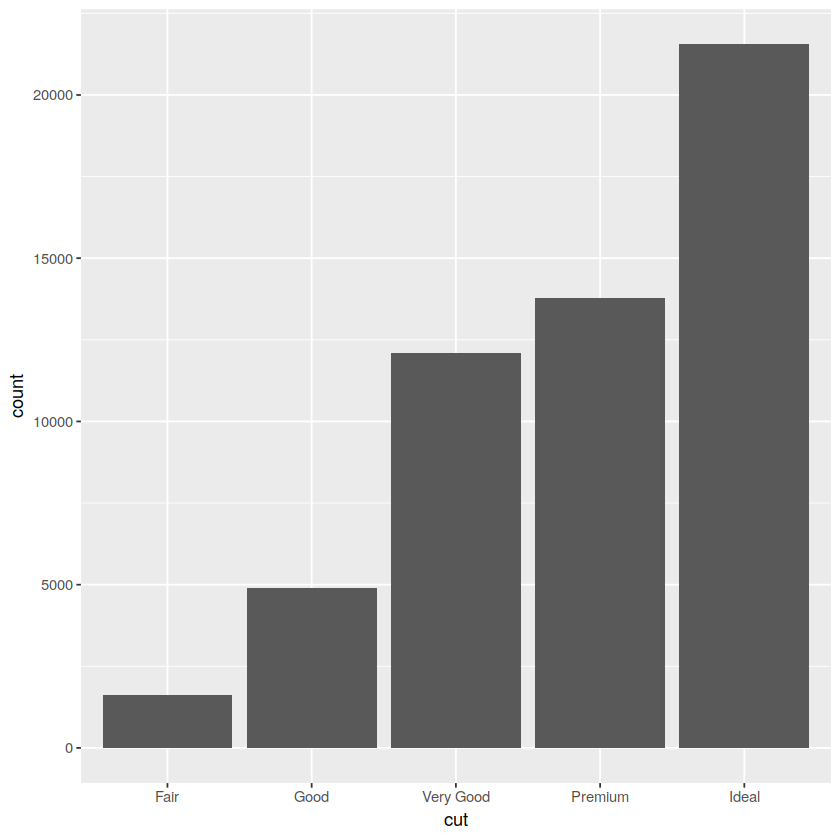

In [2]:
# diamonds data
ggplot(diamonds) + geom_bar(aes(x = cut))
# 每一个绘图函数都有一个默认统计函数，这里是计数

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


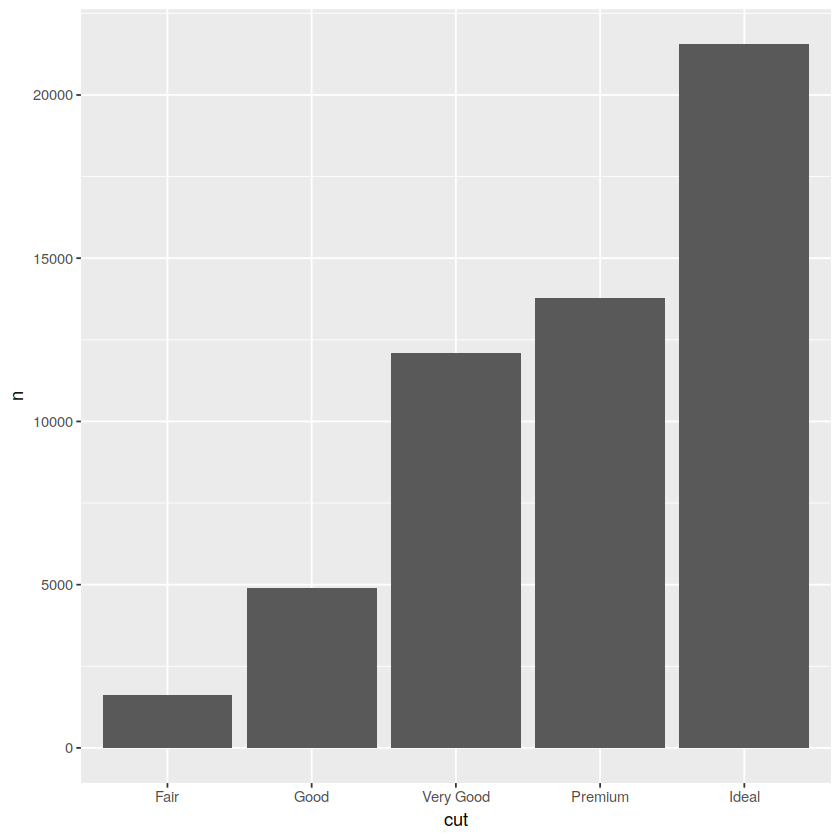

In [3]:
# 可以使用dplyr包中的count()函数手动计算
diamonds %>% count(cut) 
# 手动计算并画图
diamonds %>% count(cut) %>%  
ggplot() + geom_bar(aes(x = cut, y = n),stat = "identity")
# 需要调整stat参数，可以查看帮助文件看stat

条形图适合分类变量，连续变量可以使用直方图

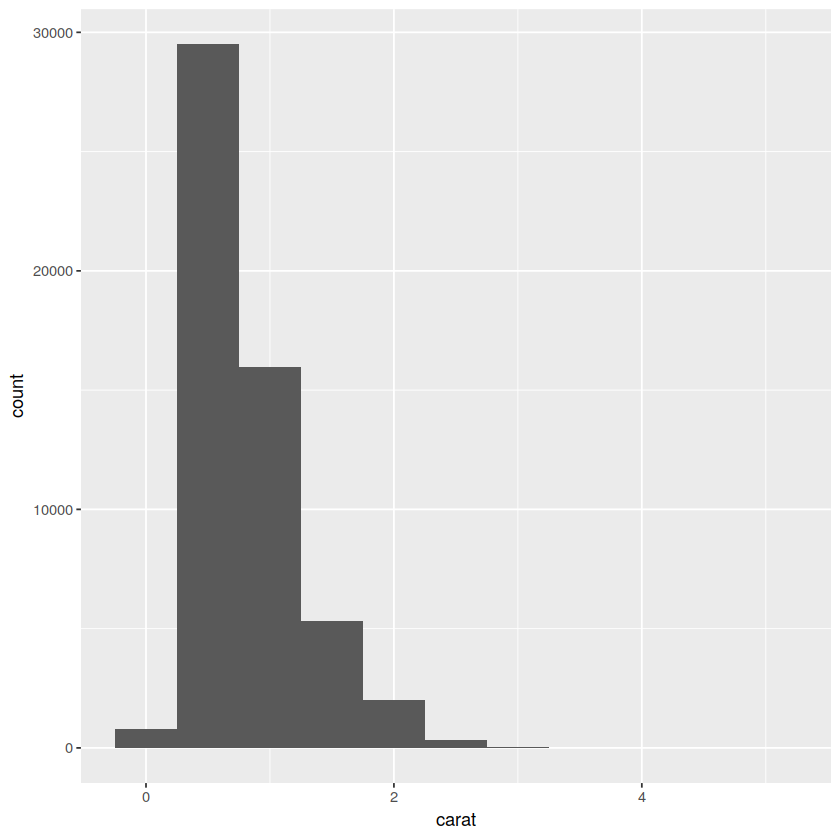

In [4]:
ggplot(diamonds) + geom_histogram(aes(x = carat), binwidth = 0.5)
# binwidth即是分箱宽度

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

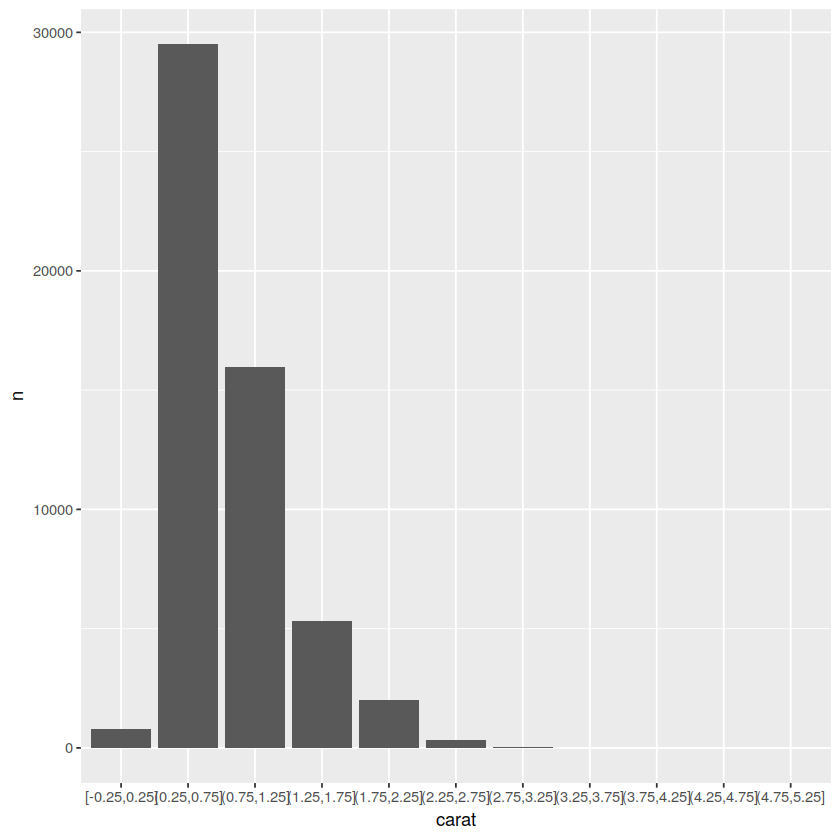

In [5]:
# 可以通过dplyr的count()函数和ggplot2的cut_width()函数组合计算
(carat0.5 <- diamonds %>% count(cut_width(carat, 0.5)))
# 可以将数据小的剔除掉，用filter
c("carat","n") -> names(carat0.5)
ggplot(carat0.5) + 
geom_histogram(aes(x = carat, y = n), stat = "identity")

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.74,Very Good,H,SI2,63.3,58,17184,8.88,8.84,5.61
2.75,Ideal,D,I1,60.9,57,13156,9.04,8.98,5.49
2.75,Premium,H,SI2,60.5,61,15415,8.99,8.97,5.48
2.77,Premium,H,I1,62.6,62,10424,8.93,8.83,5.56
2.80,Premium,I,SI2,61.1,59,15030,9.03,8.98,5.50
2.80,Good,G,SI2,63.8,58,18788,8.90,8.85,0.00


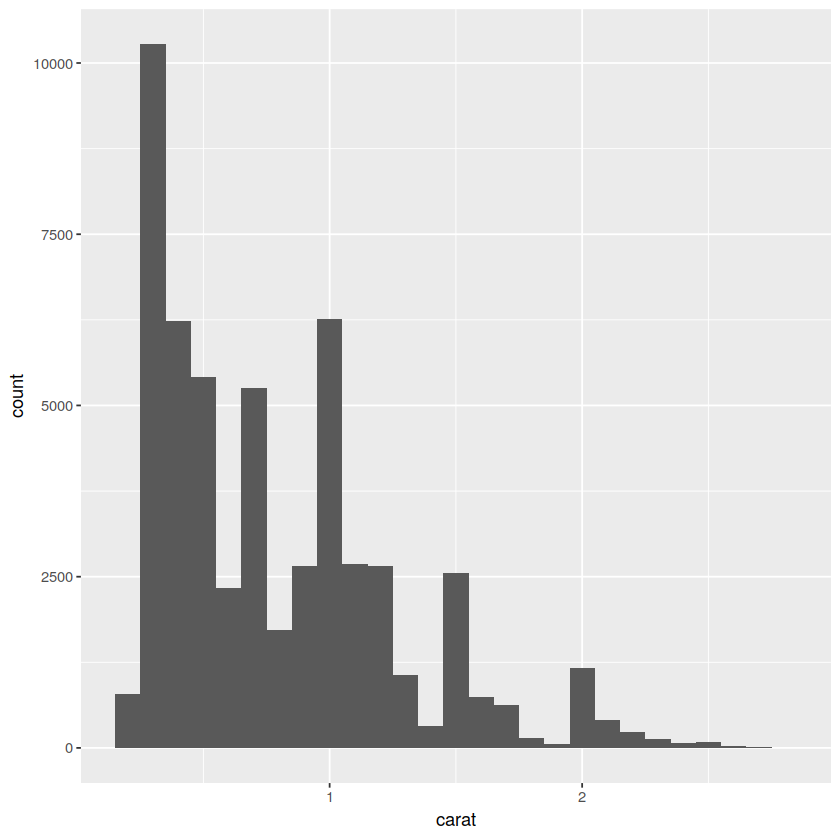

In [6]:
# 接那是
# 如果只考虑重量小于3克拉的钻石
small <- diamonds %>% filter(carat < 3)
small %>% arrange(carat) %>% tail()
ggplot(small, aes(carat)) + geom_histogram(binwidth = 0.1) 

探索性数据分析｜67如果想要在同一张图上叠加多个直方图，那么我们建议你使用geom_freqploy()函数来代替geom_histogram()函数。geom_freqploy()可以执行和geom_histogram()同样的计算过程，但前者不使用条形来显示计数，而是使用折线。叠加的折线远比叠加的条形更容易理解

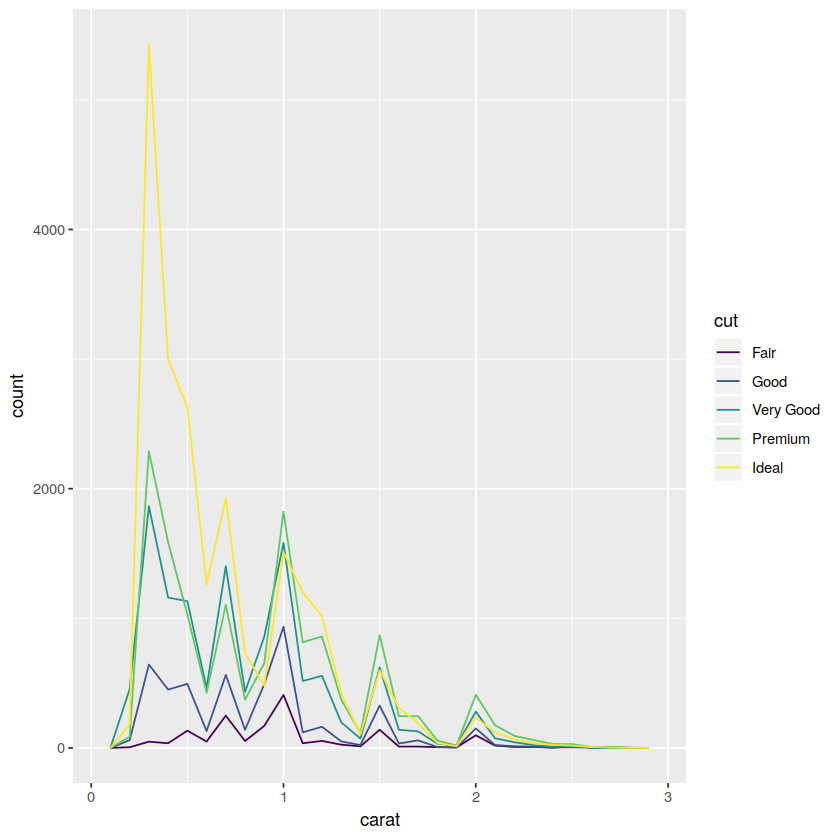

In [7]:
ggplot(small, aes(x = carat, color = cut)) + 
geom_freqpoly(binwidth = 0.1)

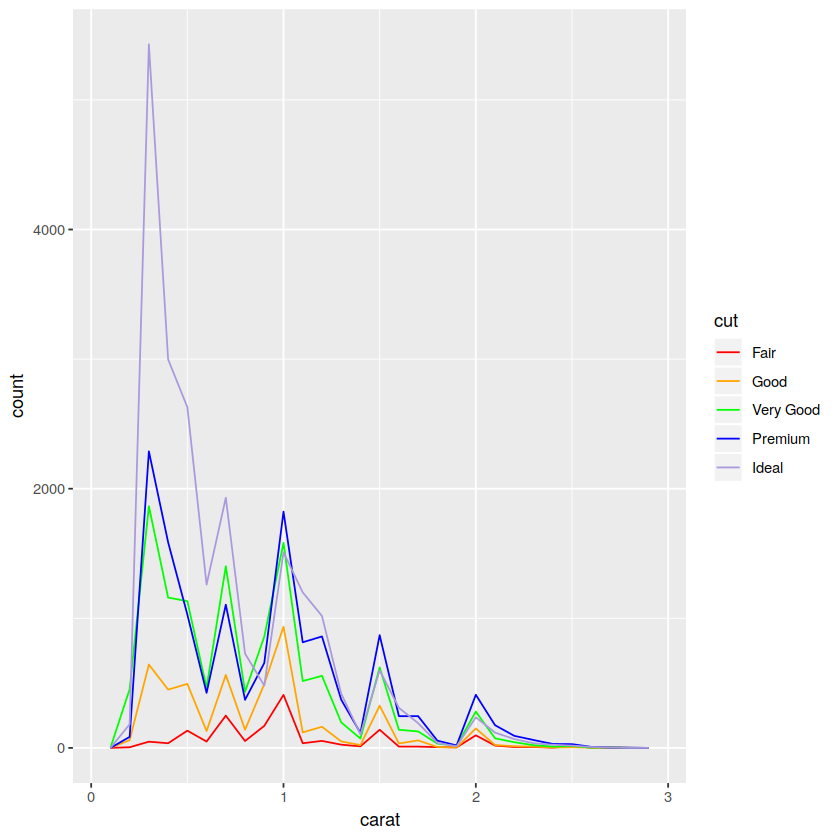

In [8]:
# 上图的黄色显示不好，我们调一调颜色
ggplot(small, aes(x = carat, color = cut)) + 
geom_freqpoly(binwidth = 0.1) + 
scale_color_manual(values = c("red","orange","green","blue","#AA99DD"))
# scale_color_manual和scale_fill_manual用于改颜色

## 典型值

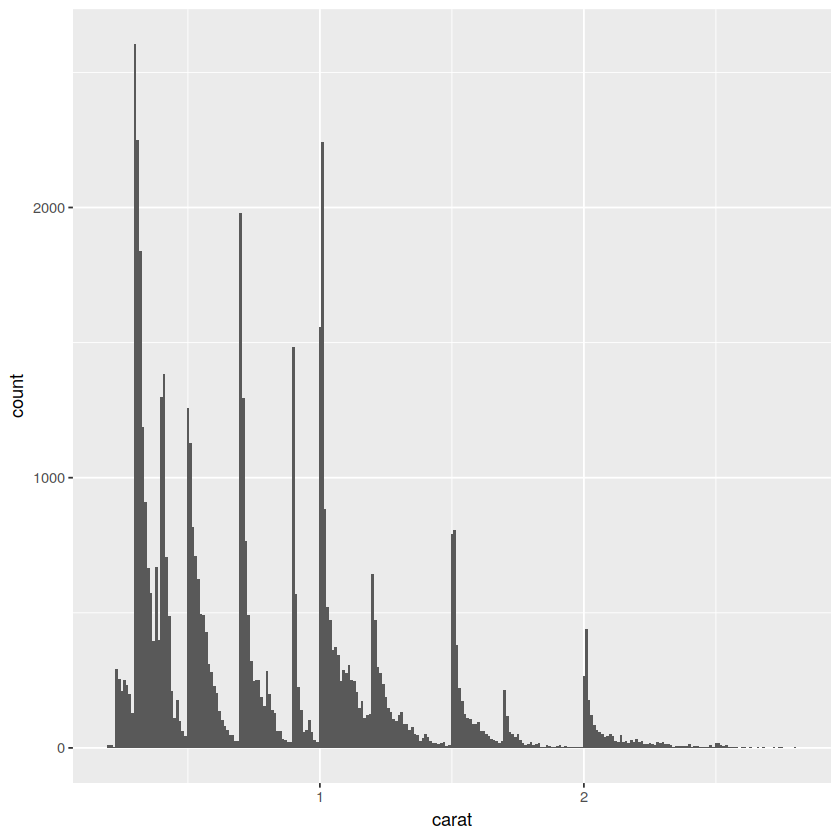

In [9]:
# 看该图和作者提的问题
ggplot(data = small, aes(x = carat)) + geom_histogram(binwidth = 0.01)
# 多个单峰且右偏

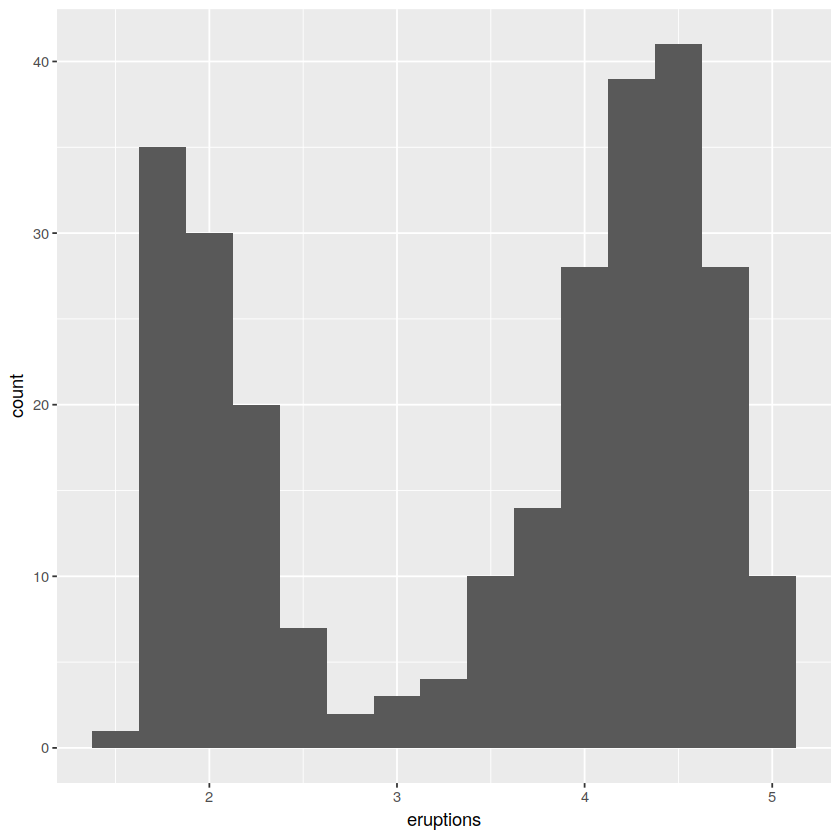

In [10]:
# 再看美国黄石国家公园喷泉的例子
ggplot(faithful, aes(eruptions)) + geom_histogram(binwidth = 0.25)
# 喷发时间聚集成了两组

## 异常值

解释看书，这里主要展示代码

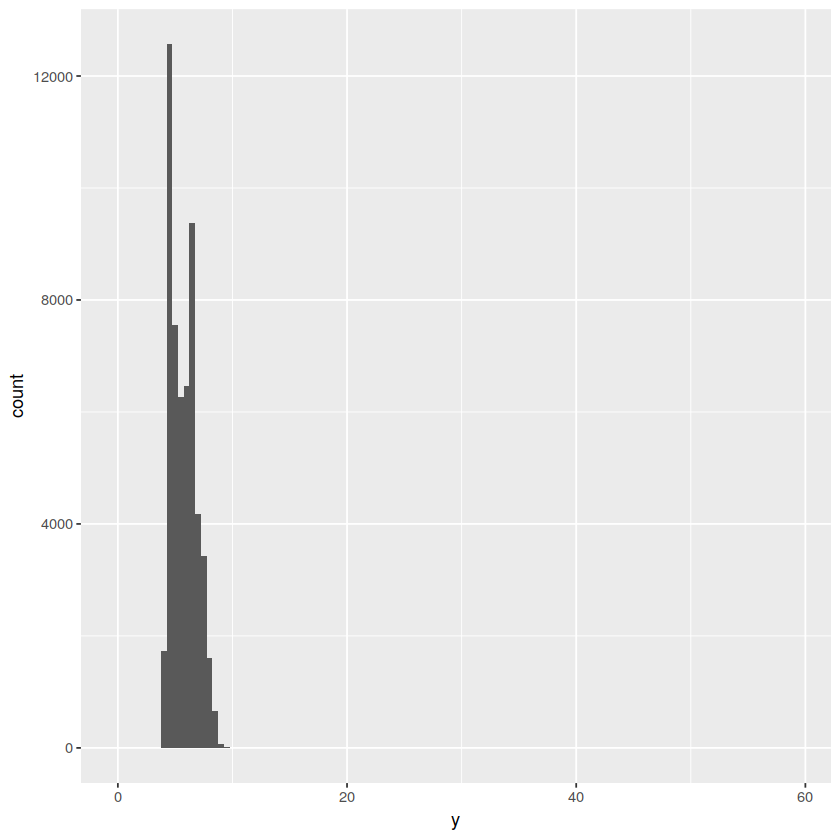

In [11]:
# 还是看diamonds数据的例子
ggplot(diamonds) + geom_histogram(aes(x = y), binwidth = 0.5)
# 可以发现y的取值范围宽的出奇

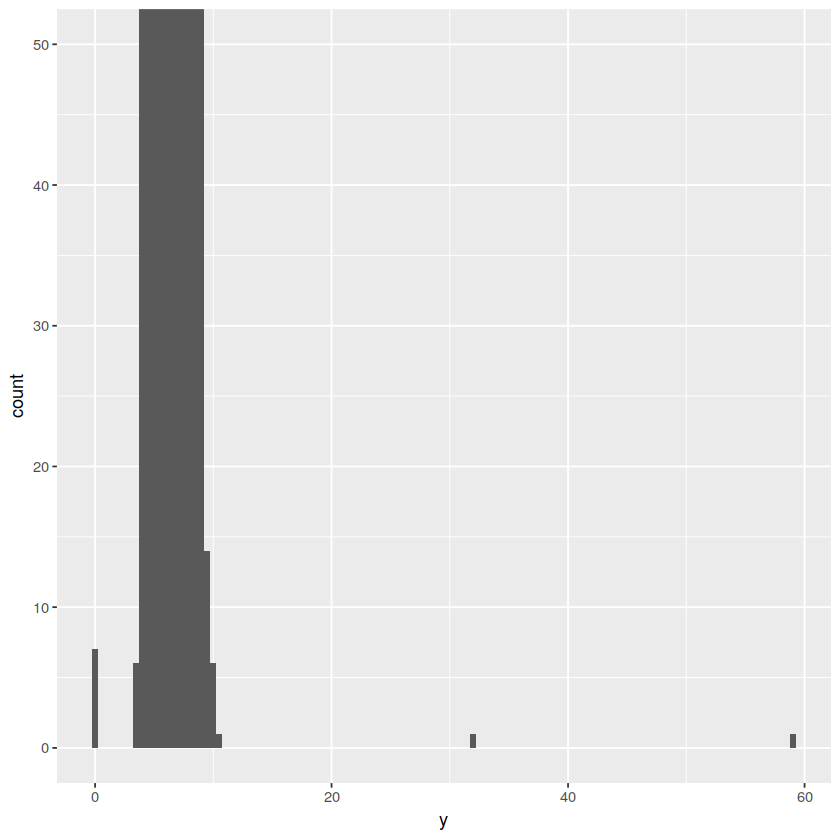

In [12]:
# 我们拉一下坐标轴看看有什么
ggplot(diamonds) + geom_histogram(aes(x = y), binwidth = 0.5) + 
coord_cartesian(ylim = c(0, 50))# 放大y轴,看帮助
# 笛卡尔坐标系是最常见，最常见的坐标系类型。 
# 在坐标系上设置限制将缩放图（就像您正在用放大镜查看它一样），
# 并且不会像在比例尺上设置限制那样更改基础数据。

In [13]:
# 可以看到有3个异常值
# 使用dplyr找出它们
diamonds %>% filter(y < 3|y > 20) %>% 
arrange(y) 
# 能立即看出来是异常值

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Very Good,H,VS2,63.3,53,5139,0.00,0.0,0.00
1.14,Fair,G,VS1,57.5,67,6381,0.00,0.0,0.00
1.56,Ideal,G,VS2,62.2,54,12800,0.00,0.0,0.00
1.20,Premium,D,VVS1,62.1,59,15686,0.00,0.0,0.00
2.25,Premium,H,SI2,62.8,59,18034,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.8,5.12
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.9,8.06


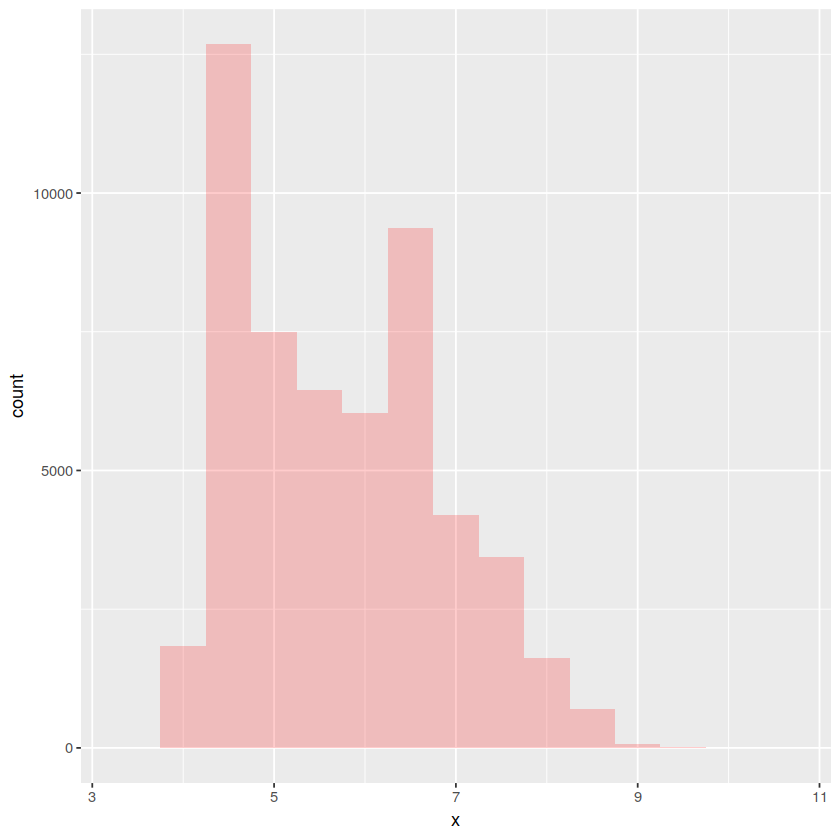

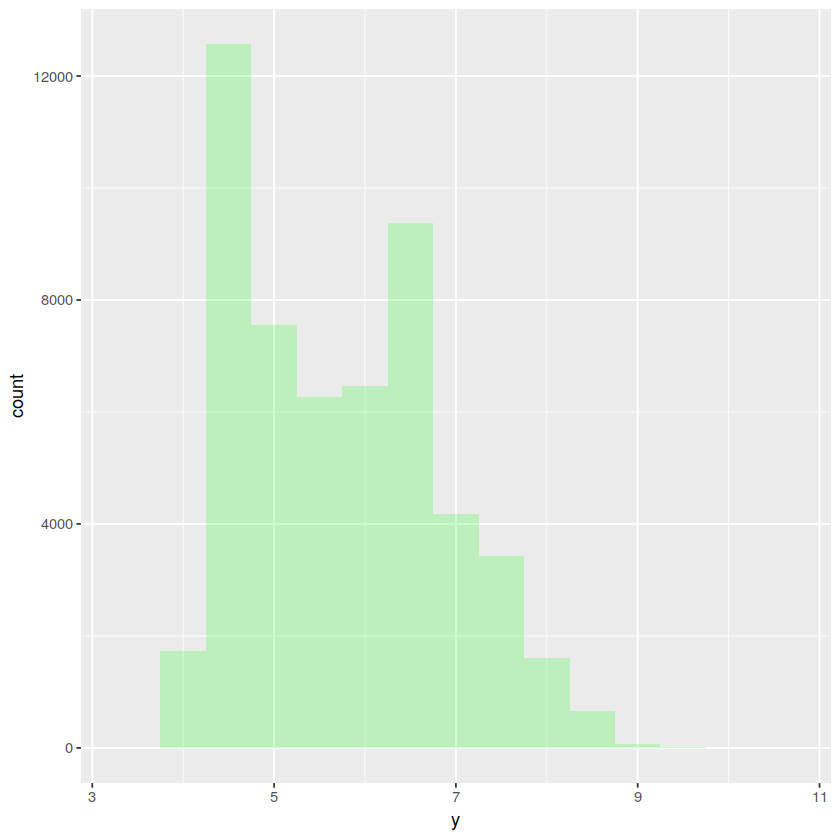

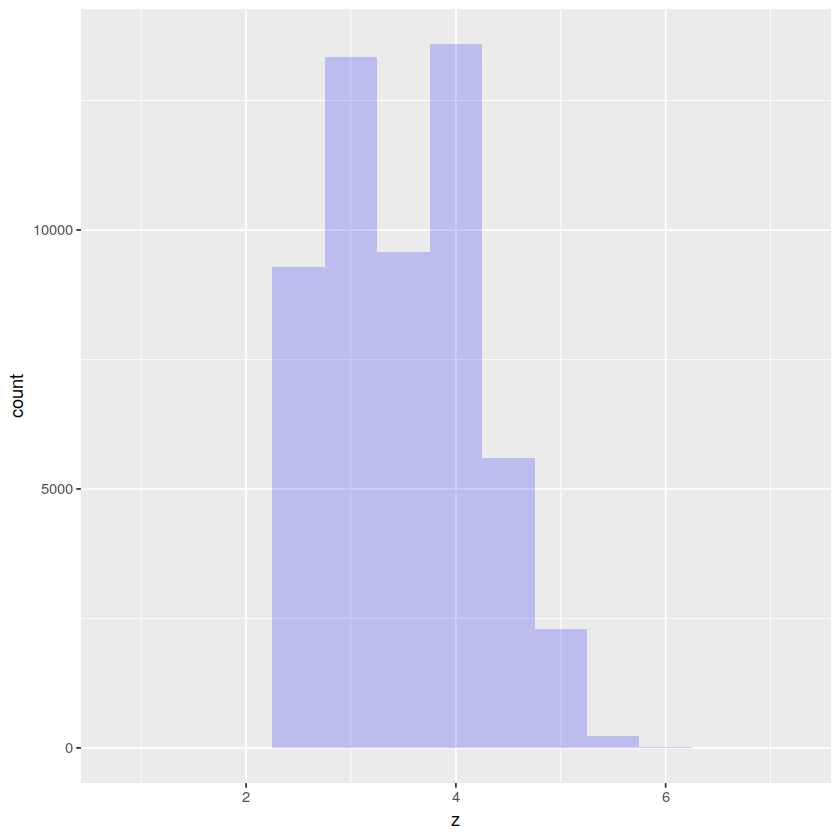

In [14]:
# 看一下练习题
# 先去掉异常值
diamonds2 <- diamonds %>% filter(y >3 & y <20 & z >0 & z <20)
ggplot(diamonds2) + 
geom_histogram(aes(x = x), binwidth = 0.5, fill = "red", alpha = 0.2) 
ggplot(diamonds2) + 
geom_histogram(aes(x = y), binwidth = 0.5, fill = "green", alpha = 0.2)
ggplot(diamonds2) + 
geom_histogram(aes(x = z), binwidth = 0.5, fill = "blue", alpha = 0.2)
# coord_cartesian(ylim = c(0,50))
# 这里可以优化代码，毕竟重复这么多

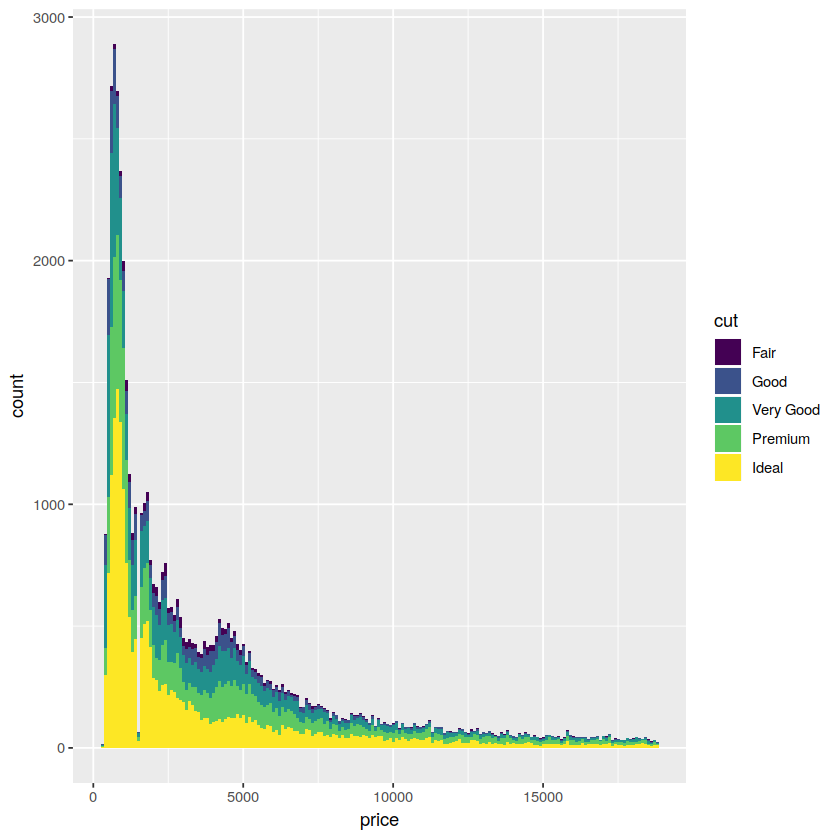

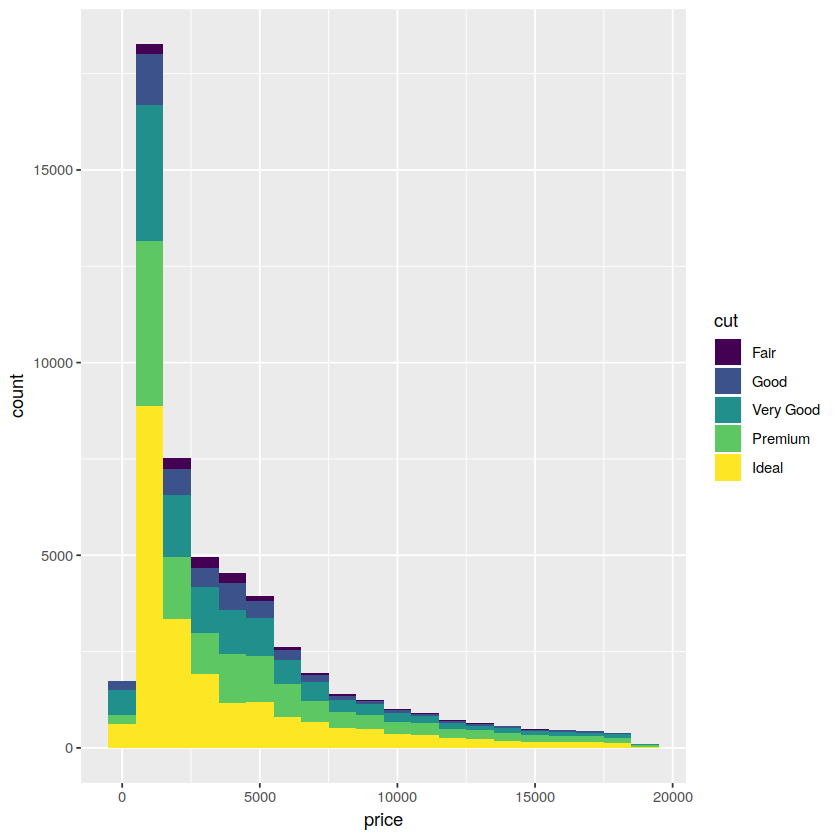

In [15]:
# 再看价格分布
ggplot(diamonds) + 
geom_histogram(aes(x = price, fill = cut), binwidth = 100)
# 能够看出来明显的长尾
ggplot(diamonds) + 
geom_histogram(aes(x = price, fill = cut), binwidth = 1000)

其他题自己看吧

## 缺失值

对于缺失值 有两种选择，一种是删掉，一种是用NA填充

Warning message:
“Removed 9 rows containing missing values (geom_point).”

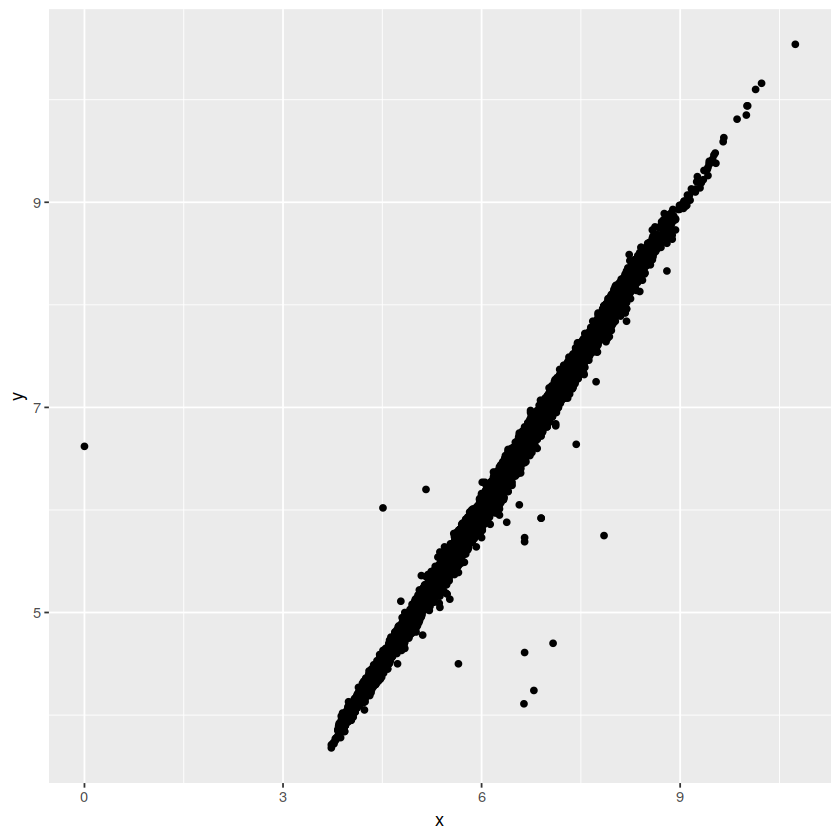

In [16]:
diamonds3 <- diamonds %>% mutate(y = ifelse(y < 3 | y > 20, NA, y))
# ifelse()函数看书
ggplot(diamonds3,aes(x = x, y = y)) + 
geom_point()
# 想要不显示警告信息可以设置na.rm = T
# geom_point(na.rm = T)

In [17]:
# 再看一个例子
nycflights13::flights %>%
mutate(cancelled = is.na(dep_time),
      sched_hour = sched_dep_time %/% 100,
      sched_min = sched_dep_time %% 100,
      sched_dep_time = sched_hour + sched_min / 60)%>%
ggplot(aes(sched_dep_time)) + 
geom_freqpoly(aes(color = cancelled), binwidth = 1/4)
# 不解释，看书

ERROR: Error in loadNamespace(name): there is no package called ‘nycflights13’


## 相关变动

In [ ]:
# 直接上图
# 价格随质量变化
ggplot(diamonds,aes(price)) + 
geom_freqpoly(aes(color = cut), binwidth = 500) + 
scale_color_manual(values = c("#FF0000","#FFAA00","#99AA00","#00FFBB","#00FF00"))

In [ ]:
ggplot(diamonds) + geom_bar(aes(cut))

In [ ]:
# 改变y轴显示内容为密度
ggplot(diamonds, aes(x = price, y = ..density..)) + 
geom_freqpoly(aes(color = cut), binwidth = 500)+
scale_color_manual(values = c("red","green","blue","orange","black"))

In [ ]:
# 箱线图
# 箱线图的特点看书
ggplot(diamonds) + geom_boxplot(aes(x = cut, y = price))

In [ ]:
# 使用reorder()函数对有序因子排序
# origin plot
ggplot(mpg,aes(x = class, y = hwy)) + geom_boxplot()
# reorder plot
ggplot(mpg) + 
geom_boxplot(aes(x = reorder(class, hwy, FUN = median),
                y = hwy))

In [ ]:
# 如果变量名很长，可以旋转坐标轴
ggplot(mpg) + 
geom_boxplot(aes(x = reorder(class, hwy, FUN = median),
                y = hwy)) + 
coord_flip()

In [ ]:
## 两个分类变量可视化
ggplot(diamonds) + 
geom_count(aes(x = cut, y = color))

In [ ]:
# 手动计算
diamonds %>% count(color, cut)

In [ ]:
# 使用geom_tile()函数填充图形可视化
# 和点是同样的意思
diamonds %>% count(color, cut) %>% 
ggplot() + geom_tile(aes(x = color, y = cut,fill = n))

In [ ]:
# 上面是两个离散变量，下面看两个连续变量
ggplot(diamonds) + 
geom_point(aes(x = carat, y = price))
# 过绘制有些严重，添加透明度
ggplot(diamonds) + 
geom_point(aes(x = carat, y = price), alpha = 1/100) 

In [ ]:
# geom_bin2d()和geom_hex()函数在两个维度上进行分箱
ggplot(data = small) +
geom_bin2d(mapping =aes(x = carat, y = price)) 

ggplot(data = small) +
geom_hex(mapping =aes(x = carat, y = price))

In [ ]:
ggplot(small, aes(carat, price)) +
geom_boxplot(aes(group = cut_width(carat, 0.1)))

ggplot(small, aes(carat, price)) +
geom_boxplot(aes(group = cut_width(carat, 0.1)), varwidth = T)
# 在这里不合适啊

ggplot(small, aes(carat, price)) +
geom_boxplot(aes(group = cut_number(carat, 20)))
# 按数量还可以哈

## 模式和模型

In [ ]:
ggplot(faithful) + 
geom_point(aes(eruptions, waiting))
# 看这个图就能明白为啥喷发时间聚类成了两类

In [ ]:
library(modelr)

ggplot(diamonds,aes(x = log(carat), y = log(price))) + 
geom_point() + 
geom_smooth(method = "lm",na.rm = T)

(mod <- lm(log(price) ~ log(carat), data = diamonds))
# 求线性关系
diamonds5 <- diamonds %>% add_residuals(mod) %>% 
mutate(resid = exp(resid))
# add_residuals添加残差
# exp(1) = e(自然对数的底)
ggplot(diamonds5) + geom_point(aes(x = carat, y = resid))

In [ ]:
ggplot(diamonds5) + geom_boxplot(aes(cut, resid))

## ggplot2调用
书上的代码写的比较完整，我在写的时候有些参数已经省略了，没想到作者还专门在此提了提，以便于后面的代码更加简洁，刚开始还是不要省略的好，等到后面熟练了，那就要能省则省，这样简洁美观；管道真的是用了之后就离不开了，真的好用。

本章结束，更多资源在网上寻找。